# تحلیل شبکه اجتماعی توییترهای آقای ظریف

In [1]:
import networkx as nx
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sns.set_style('whitegrid')

In [4]:
df=pd.read_excel('ZarifTweet.xlsx')
df

,Created-At,From-User,From-User-Id,To-User,To-User-Id,Language,Source,Text,Geo-Location-Latitude,Geo-Location-Longitude,Retweet-Count,Id
0,2016-07-19 22:13:29,Javad Zarif,47813521,NaN,-1,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Alarmed about developments unfolding in #Bahra...,NaN,NaN,325,755480700011352064
1,2016-07-16 03:43:34,Javad Zarif,47813521,NaN,-1,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Turkish people's brave defense of democracy & ...,NaN,NaN,1054,754114217159065600
2,2016-07-16 00:45:56,Javad Zarif,47813521,NaN,-1,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Deeply concerned about the crisis in Turkey. S...,NaN,NaN,1267,754069513935683584
3,2016-07-14 18:38:00,Javad Zarif,47813521,NaN,-1,und,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#IranDealOneYearLater https://t.co/2VgKIzpLU6,NaN,NaN,271,753614530886893568
4,2016-07-14 18:18:43,Javad Zarif,47813521,NaN,-1,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",3/3 Mutual respect and fulfillment of JCPOA ob...,NaN,NaN,127,753609678995726336
...,...,...,...,...,...,...,...,...,...,...,...,...
167,2013-09-05 05:29:00,Javad Zarif,47813521,NaN,-1,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",tragedy in syria is a trap to push a reluctant...,NaN,NaN,157,375445430122721280
168,2013-09-05 05:01:12,Javad Zarif,47813521,amin_acdc,1663858934,fa,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@EshaghiAmin سلام. گفته بودم که در تويتر به ا...,NaN,NaN,19,375438434053025792
169,2013-09-05 04:51:18,Javad Zarif,47813521,NaN,-1,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","unequivocal rejection of #chemicalweapons, mi...",NaN,NaN,55,375435943441747968
170,2013-09-05 04:45:20,Javad Zarif,47813521,NaN,-1,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Happy Rosh Hashanah,NaN,NaN,612,375434442031910912


In [5]:
df=df[['From-User-Id','To-User-Id']]
df

,From-User-Id,To-User-Id
0,47813521,-1
1,47813521,-1
2,47813521,-1
3,47813521,-1
4,47813521,-1
...,...,...
167,47813521,-1
168,47813521,1663858934
169,47813521,-1
170,47813521,-1


In [6]:
# Read Our Edgelist
G = nx.from_pandas_edgelist(df,source="From-User-Id",target="To-User-Id")

In [7]:
type(G)

networkx.classes.graph.Graph

In [8]:
print(G)

Graph with 9 nodes and 8 edges


In [9]:
G.nodes()

NodeView((47813521, -1, 2628588649, 2164626723, 236142773, 15446551, 626583891, 24534786, 1663858934))

In [10]:
len(G.nodes())

9

In [11]:
len(G.edges())

8

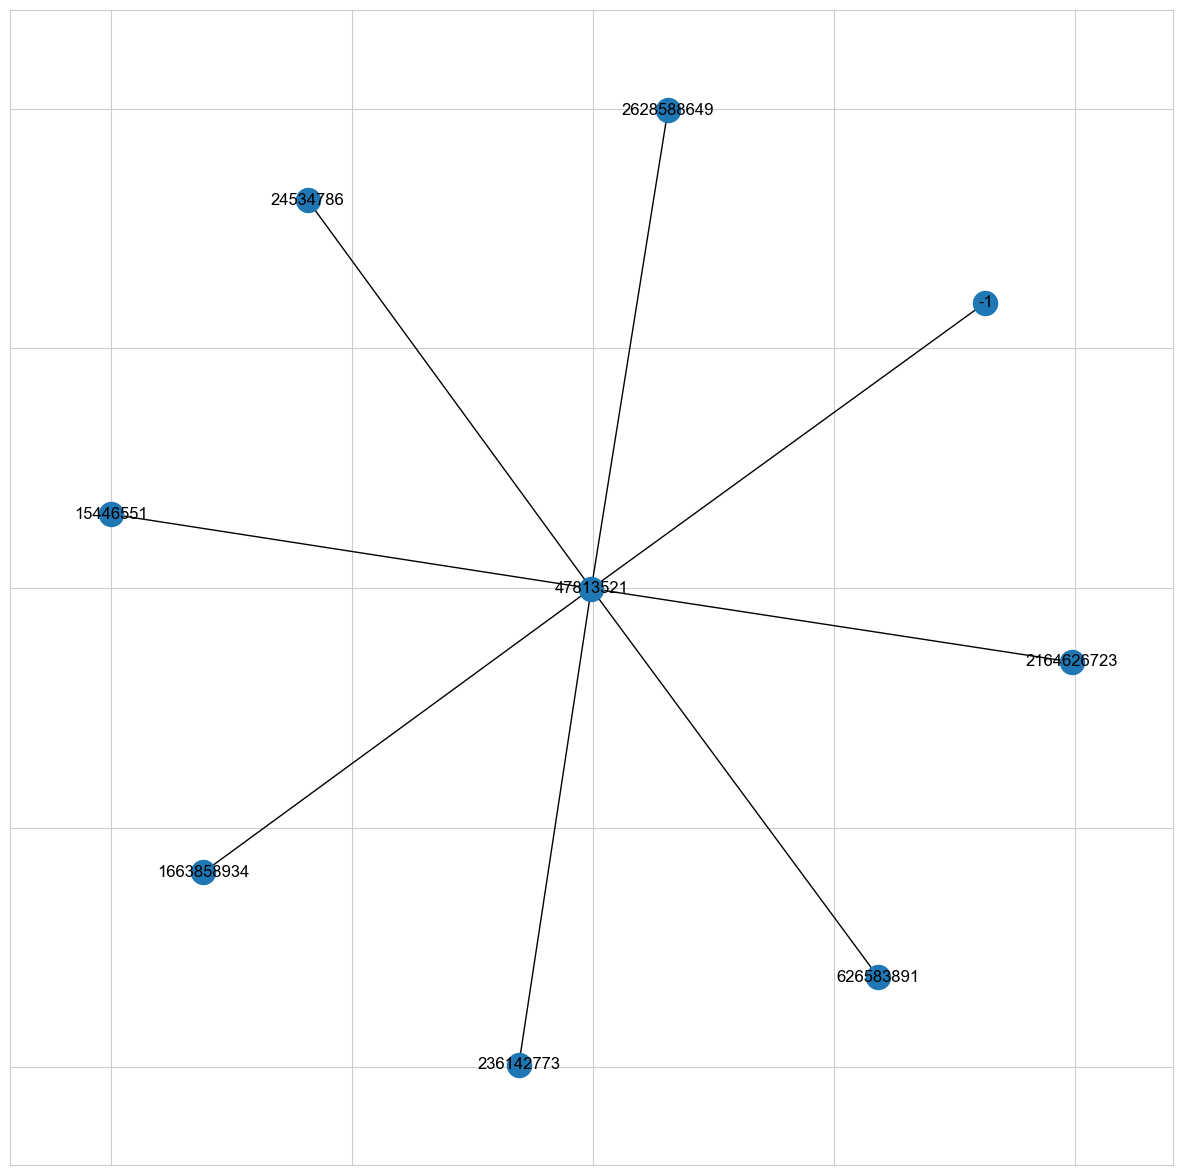

In [12]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G)
plt.show()

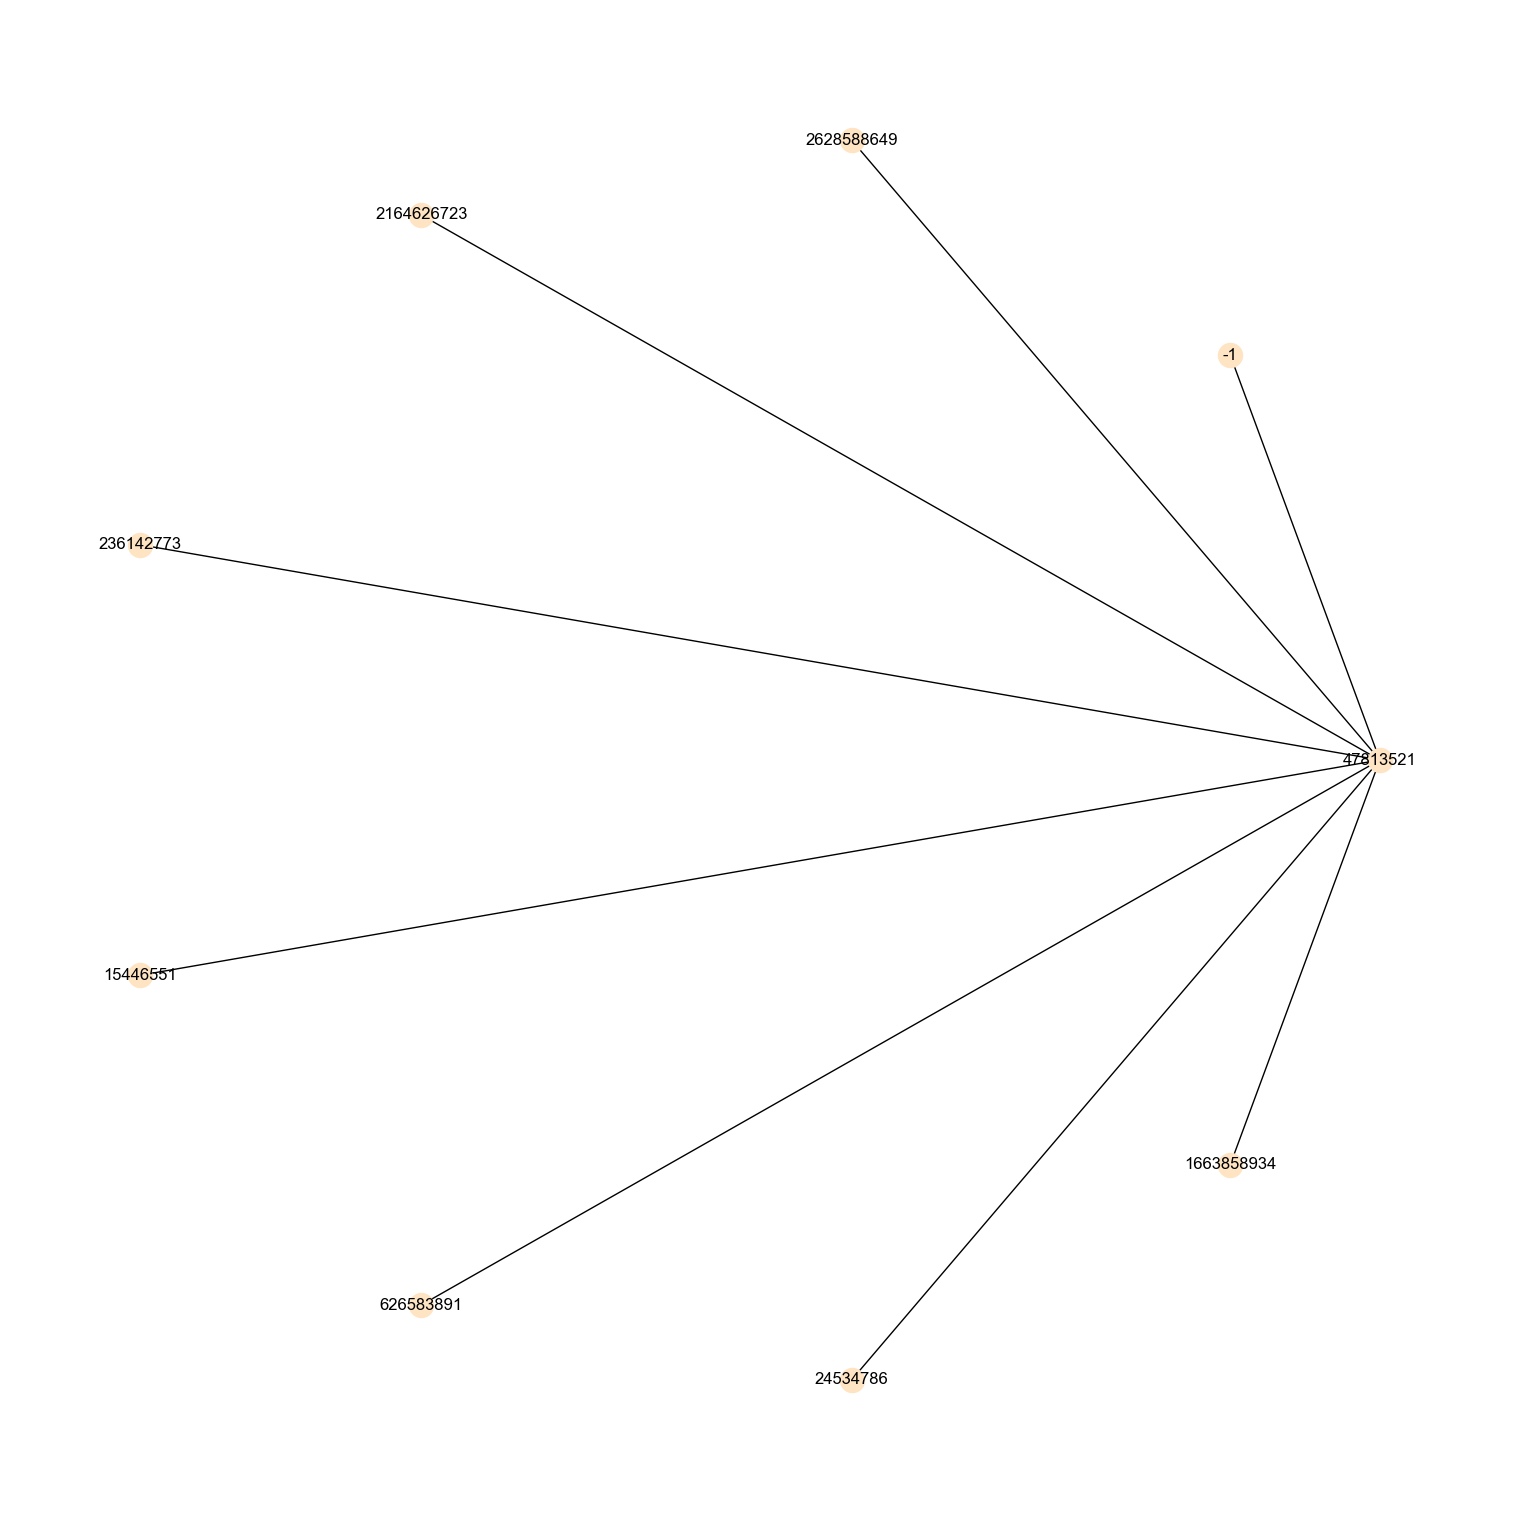

In [13]:
plt.figure(figsize=(15,15))
nx.draw_circular(G, node_color='bisque', with_labels=True)

In [14]:
G=G.to_undirected()

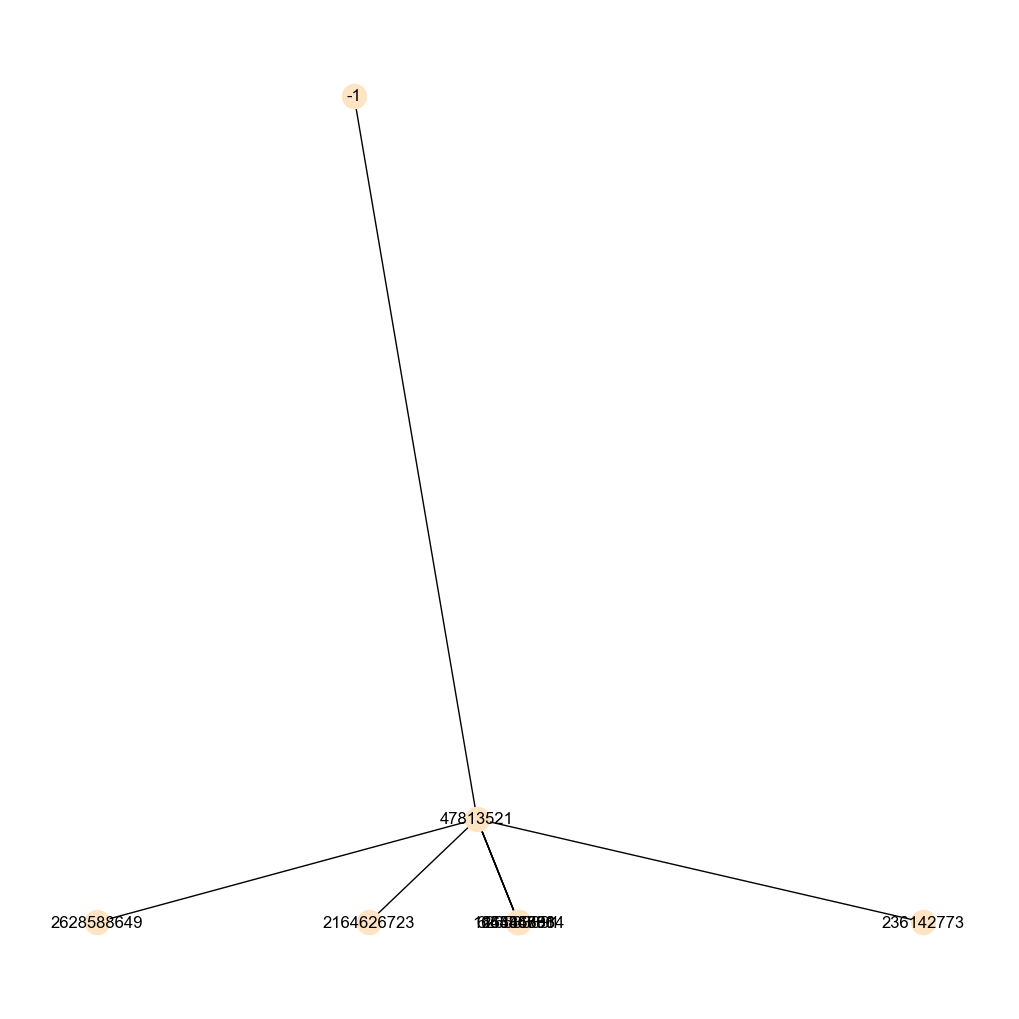

In [16]:
plt.figure(figsize=(10,10))
nx.draw_spectral(G, node_color='bisque', with_labels=True)

In [17]:
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 9
Number of edges 8
Average degree 1.7777777777777777


In [18]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [19]:
deg= dict(G.degree())
nx.set_node_attributes(G,deg,'degree')

bc=nx.betweenness_centrality(G)
nx.set_node_attributes(G,bc,'BC')

t= pd.DataFrame.from_dict(dict(G.nodes(data=True)),orient='index')
t[0:5]

,degree,BC
47813521,8,1.0
-1,1,0.0
2628588649,1,0.0
2164626723,1,0.0
236142773,1,0.0


In [20]:
pos = nx.spring_layout(G, seed=675)

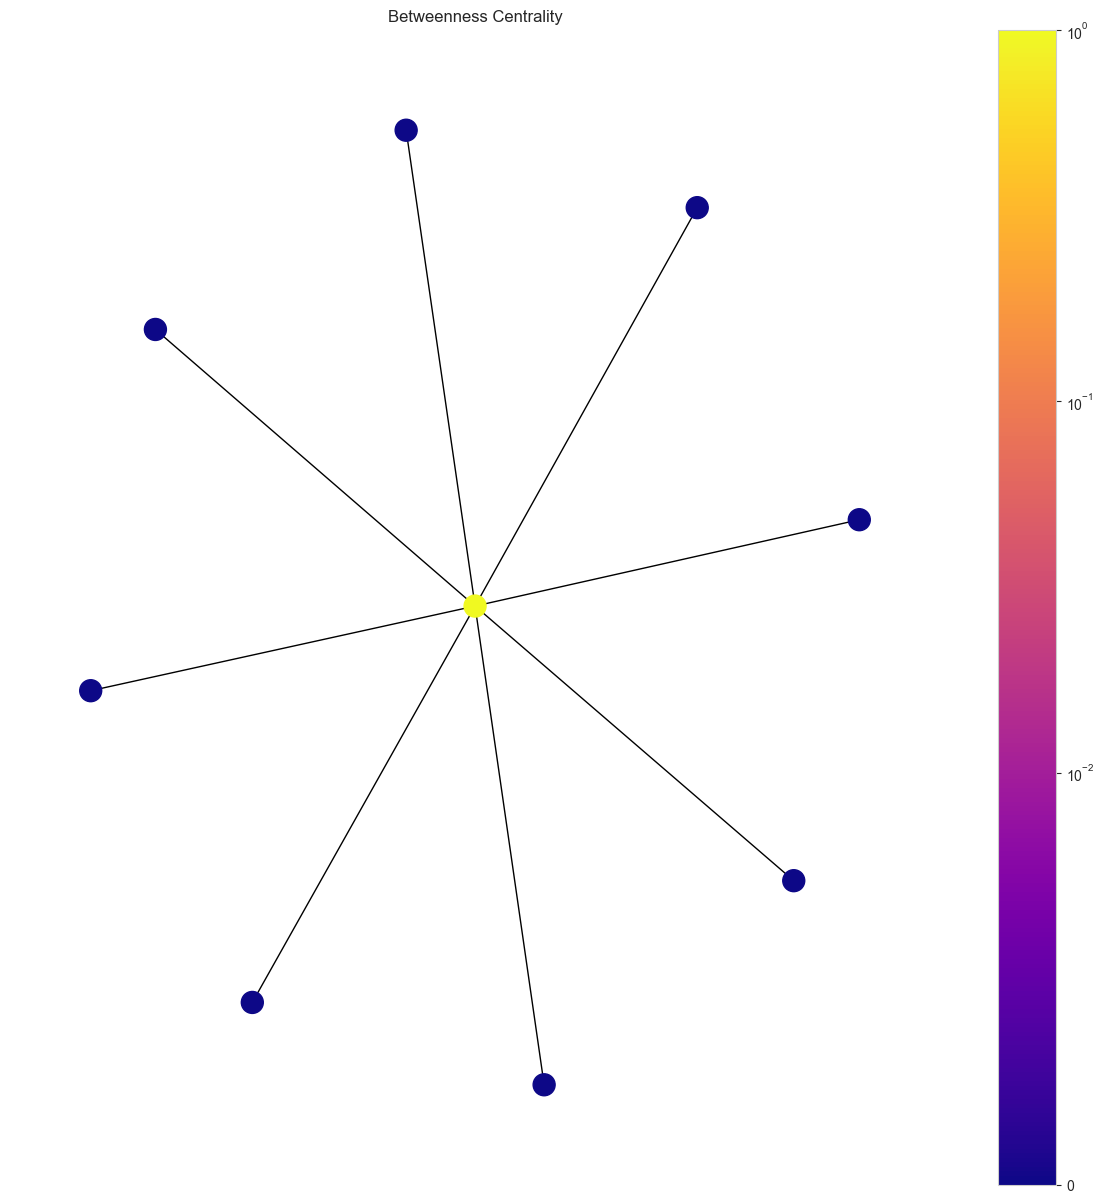

In [21]:
plt.figure(figsize=(15,15))
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

In [22]:
t.sort_values('BC',ascending=False)[0:4]

,degree,BC
47813521,8,1.0
-1,1,0.0
2628588649,1,0.0
2164626723,1,0.0


In [23]:
max(deg.keys() , key=lambda  x:deg[x]) # بیشترین ارتباط نود

47813521

In [24]:
deg= dict(G.degree())
nx.set_node_attributes(G,deg,'degree')

dc=nx.degree_centrality(G)
nx.set_node_attributes(G,dc,'DC')

t= pd.DataFrame.from_dict(dict(G.nodes(data=True)),orient='index')
t[0:5]

,degree,BC,DC
47813521,8,1.0,1.000
-1,1,0.0,0.125
2628588649,1,0.0,0.125
2164626723,1,0.0,0.125
236142773,1,0.0,0.125


In [25]:
t.sort_values('DC',ascending=False)[0:4]

,degree,BC,DC
47813521,8,1.0,1.000
-1,1,0.0,0.125
2628588649,1,0.0,0.125
2164626723,1,0.0,0.125


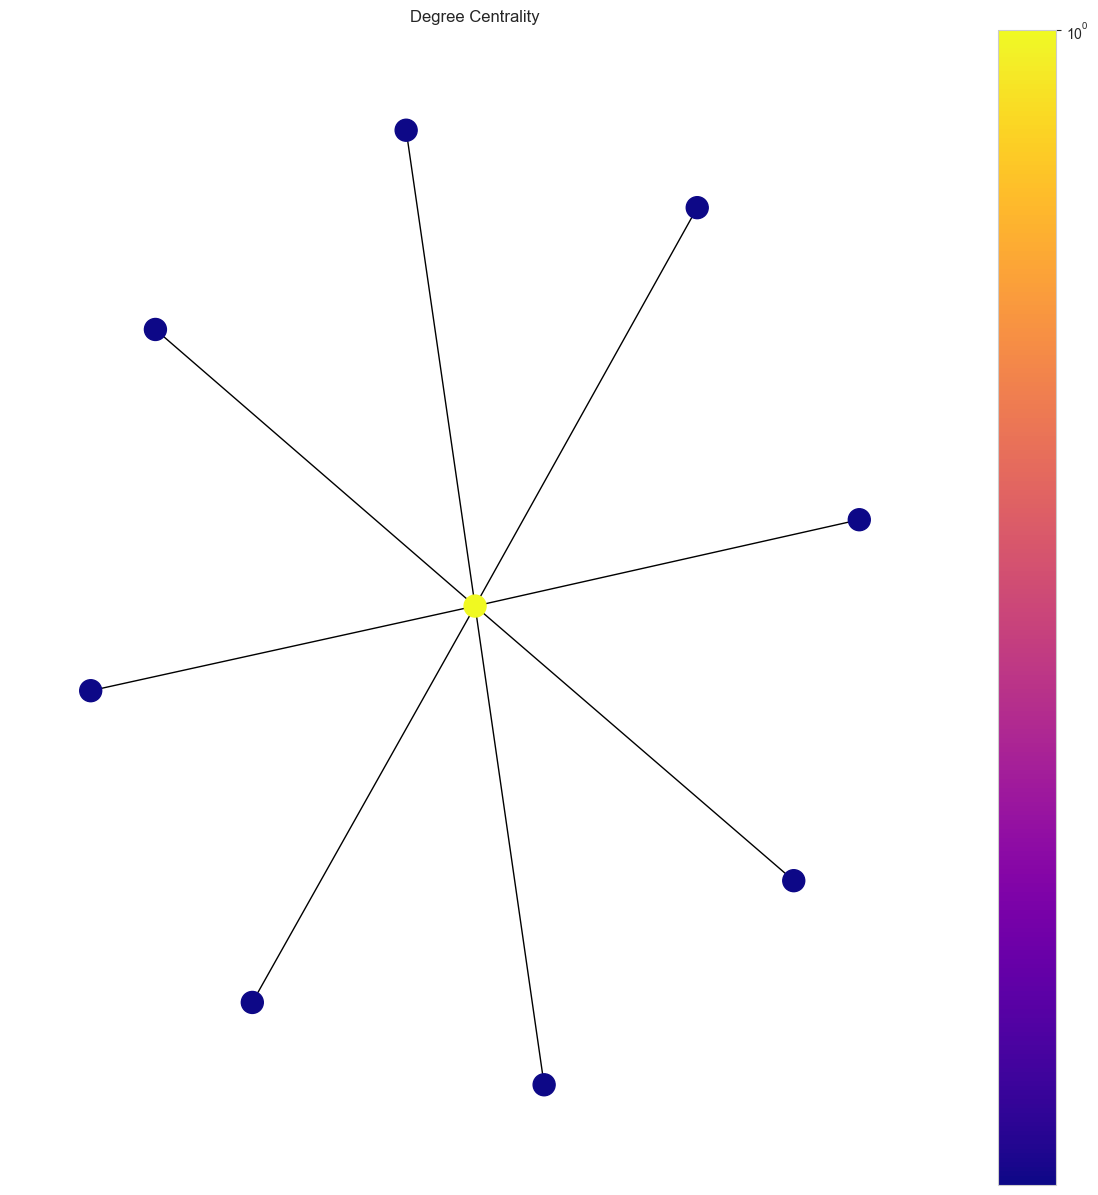

In [26]:
plt.figure(figsize=(15,15))
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

In [27]:
cc=nx.clustering(nx.Graph(G))
cc

{47813521: 0,
 -1: 0,
 2628588649: 0,
 2164626723: 0,
 236142773: 0,
 15446551: 0,
 626583891: 0,
 24534786: 0,
 1663858934: 0}

In [28]:
acc = nx.average_clustering(nx.Graph(G))
print(acc)

0.0


In [29]:
trans = nx.transitivity(G)
print(trans)

0


In [30]:
deg= dict(G.degree())
nx.set_node_attributes(G,deg,'degree')

hc=nx.harmonic_centrality(G)
nx.set_node_attributes(G,hc,'HC')

t= pd.DataFrame.from_dict(dict(G.nodes(data=True)),orient='index')
t[0:5]

,degree,BC,DC,HC
47813521,8,1.0,1.000,8.0
-1,1,0.0,0.125,4.5
2628588649,1,0.0,0.125,4.5
2164626723,1,0.0,0.125,4.5
236142773,1,0.0,0.125,4.5


In [31]:
t.sort_values('HC',ascending=False)[0:4]

,degree,BC,DC,HC
47813521,8,1.0,1.000,8.0
-1,1,0.0,0.125,4.5
2628588649,1,0.0,0.125,4.5
2164626723,1,0.0,0.125,4.5


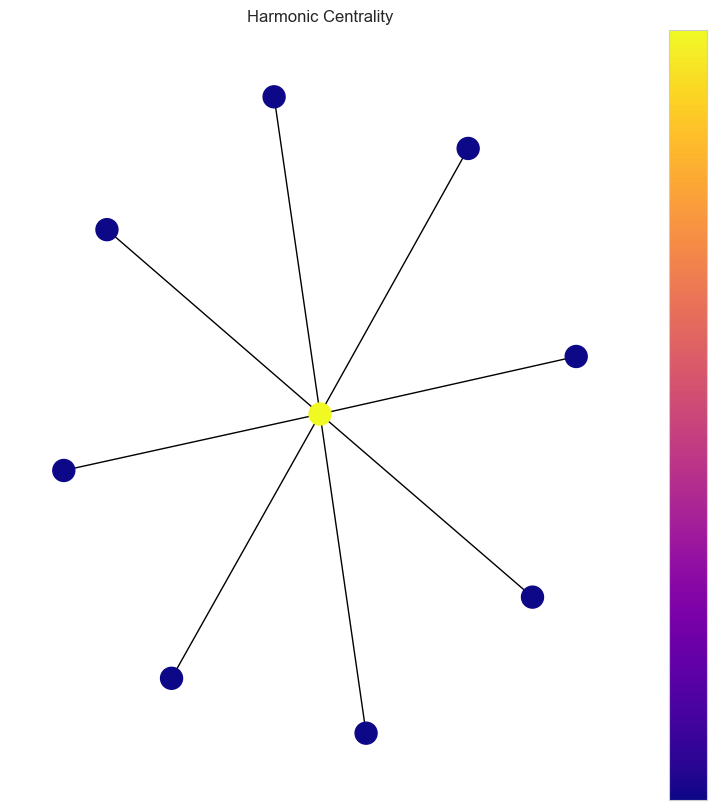

In [33]:
plt.figure(figsize=(10,10))
draw(G, pos, nx.harmonic_centrality(G), 'Harmonic Centrality')

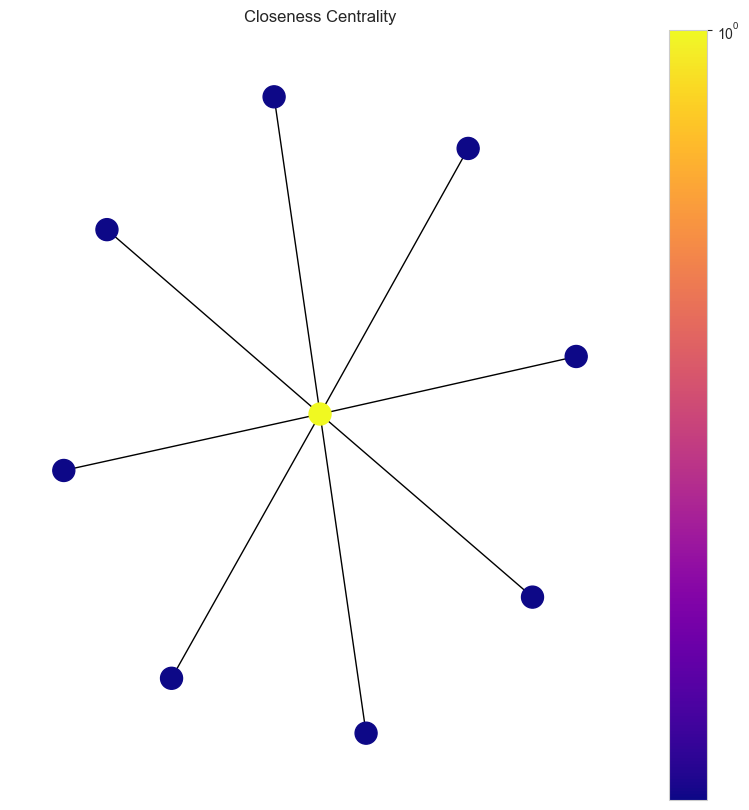

In [34]:
plt.figure(figsize=(10,10))
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

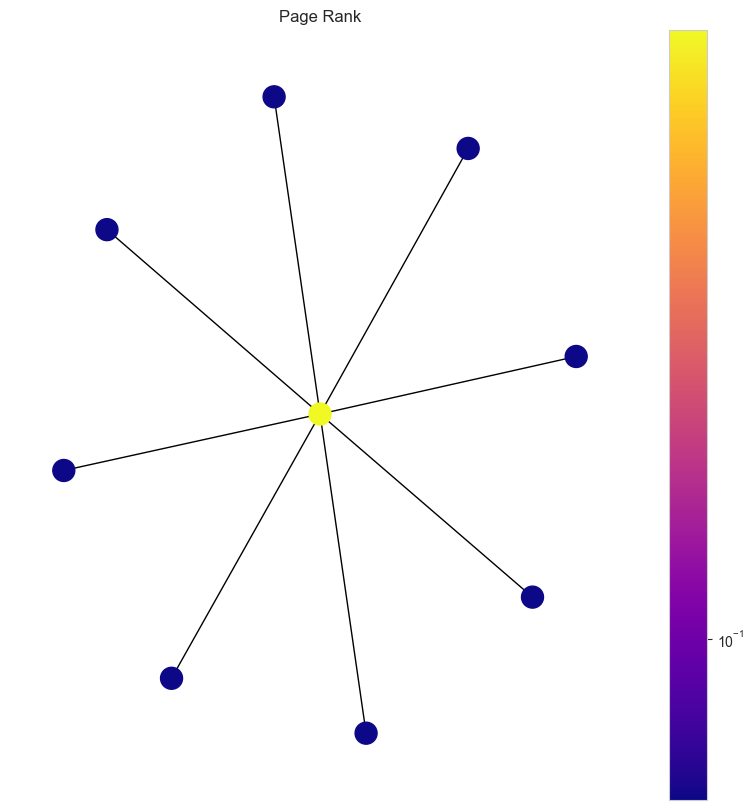

In [35]:
plt.figure(figsize=(10,10))
draw(G, pos, nx.pagerank(G), 'Page Rank')

In [37]:
nx.shortest_path(G,2628588649,2164626723)

[2628588649, 47813521, 2164626723]

In [38]:
dgr = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
har = nx.harmonic_centrality(G)
bet = nx.betweenness_centrality(G)
pgr = nx.pagerank(G)
hits = nx.hits(G)

In [39]:
centralities = pd.concat(
[pd.Series(c) for c in (hits[1], pgr, har, clo, hits[0], dgr, bet)],
axis=1)
centralities.columns = ("Authorities", "PageRank",
"Harmonic Closeness", "Closeness", "Hubs",
"Degree", "Betweenness")
centralities["Harmonic Closeness"] /= centralities.shape[0]

In [40]:
centralities["Harmonic Closeness"]

 47813521      0.888889
-1             0.500000
 2628588649    0.500000
 2164626723    0.500000
 236142773     0.500000
 15446551      0.500000
 626583891     0.500000
 24534786      0.500000
 1663858934    0.500000
Name: Harmonic Closeness, dtype: float64

In [41]:
# Calculate the correlations for each pair of centralities
import numpy as np
c_df = centralities.corr()
ll_triangle = np.tri(c_df.shape[0], k=-1)
c_df *= ll_triangle
c_series = c_df.stack().sort_values()
c_series.tail()

Harmonic Closeness  Authorities    1.0
Degree              Authorities    1.0
Closeness           PageRank       1.0
Harmonic Closeness  PageRank       1.0
PageRank            Authorities    1.0
dtype: float64

In [42]:
deg= dict(G.degree())
nx.set_node_attributes(G,deg,'degree')

cc = nx.closeness_centrality(G)
nx.set_node_attributes(G,cc,'CC')

t= pd.DataFrame.from_dict(dict(G.nodes(data=True)),orient='index')
t[0:5]

,degree,BC,DC,HC,CC
47813521,8,1.0,1.000,8.0,1.000000
-1,1,0.0,0.125,4.5,0.533333
2628588649,1,0.0,0.125,4.5,0.533333
2164626723,1,0.0,0.125,4.5,0.533333
236142773,1,0.0,0.125,4.5,0.533333
